In [1]:
%matplotlib inline
from pprint import pprint

import plot
from simulate import simulate_withdrawals
from harvesting import N_60_RebalanceHarvesting, N_100_RebalanceHarvesting
import harvesting

import itertools
from decimal import Decimal
from montecarlo import conservative
import metrics

/Users/justus/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


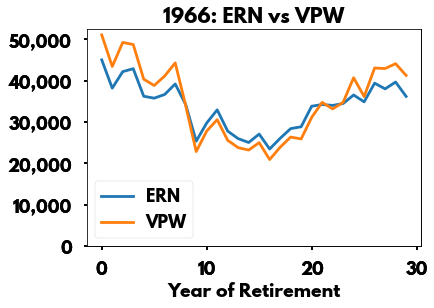

/Users/justus/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


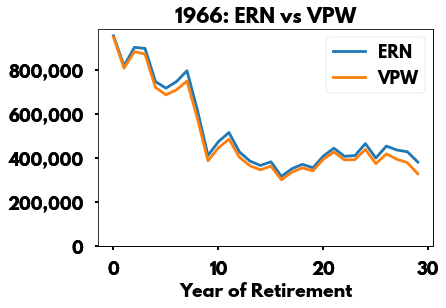


cew
----------
ern 31213.85565462652893785896686
vpw 29625.47457101831371020234908

ulcer - income (real)
----------
ern 0.2805808384470566
vpw 0.3595990253266432

ulcer - income (nominal)
----------
ern 0.05786380009524587
vpw 0.10025892052768569

ulcer - portfolio (real)
----------
ern 0.4911326999556337
vpw 0.5132563216985772

ulcer - portfolio (nominal)
----------
ern 0.11849328208818342
vpw 0.12138261269807303


In [18]:
import math
from market import Returns_US_1871
import withdrawal

START_YEAR = 1966

def CAPEPercentage(p, h):
    return withdrawal.CAPEPercentage(p, h, start_year=START_YEAR, a=.0208, b=0.4)

def VPW(p, h):
    return withdrawal.VPW(p, h, years_left=40)

def ERN_325(p, h):
    return withdrawal.ConstantDollar(p, h, rate=Decimal('0.0325'))

def compare_em_vs_vpw(series, years=40, title=''):
    (r1, r2) = itertools.tee(series)
    portfolio = (800000, 200000)
#    x = simulate_withdrawals(r1, years=years, harvesting=harvesting.make_rebalancer(0.8), withdraw=CAPEPercentage, portfolio=portfolio)
    x = simulate_withdrawals(r1, years=years, harvesting=harvesting.make_rebalancer(0.8), withdraw=withdrawal.EM, portfolio=portfolio)
#    x = simulate_withdrawals(r1, years=years, harvesting=harvesting.make_rebalancer(0.8), withdraw=ERN_325, portfolio=portfolio)
    y = simulate_withdrawals(r2, years=years, harvesting=harvesting.make_rebalancer(0.8), withdraw=VPW, portfolio=portfolio)

    plot.plot_n({'ERN' : [n.withdraw_r for n in x], 'VPW' : [n.withdraw_r for n in y]}, 'Year of Retirement', title)
    plot.plot_n({'ERN' : [n.portfolio_r for n in x], 'VPW' : [n.portfolio_r for n in y]}, 'Year of Retirement', title)
    
    print()
    print ('cew')
    print ('-' * 10)
    print('ern', metrics.cew([n.withdraw_r for n in x]))
    print('vpw', metrics.cew([n.withdraw_r for n in y]))

#    print ('hreff-4')
#    print ('-' * 10)
#    print('ern', metrics.hreff([n.withdraw_pct_orig for n in x], [n.returns for n in x]))
#    print('vpw', metrics.hreff([n.withdraw_pct_orig for n in y], [n.returns for n in y]))

    print()
    print ('ulcer - income (real)')
    print ('-' * 10)
    print('ern', metrics.ulcer([n.withdraw_r for n in x]))
    print('vpw', metrics.ulcer([n.withdraw_r for n in y]))

    print()
    print ('ulcer - income (nominal)')
    print ('-' * 10)
    print('ern', metrics.ulcer([n.withdraw_n for n in x]))
    print('vpw', metrics.ulcer([n.withdraw_n for n in y]))

    print()
    print ('ulcer - portfolio (real)')
    print ('-' * 10)
    print('ern', metrics.ulcer([n.portfolio_r for n in x]))
    print('vpw', metrics.ulcer([n.portfolio_r for n in y]))

    print()
    print ('ulcer - portfolio (nominal)')
    print ('-' * 10)
    print('ern', metrics.ulcer([n.portfolio_n for n in x]))
    print('vpw', metrics.ulcer([n.portfolio_n for n in y]))

    
def ern_vs_vpw(year, years=40):
    compare_em_vs_vpw(Returns_US_1871().iter_from(year), title='%d: ERN vs VPW' % year, years=years)

ern_vs_vpw(START_YEAR, years=30)